In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import sys

In [3]:
from sklearn.model_selection import train_test_split
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_, _) = fashion_mnist.load_data()
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)
print(images_train.shape, targets_train.shape)
print(images_test.shape, targets_test.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [2]:
model = tf.keras.models.load_model('simple_nn.h5')

### PREDICTION

In [4]:
model.predict(images_test[0:1])

array([[6.7469811e-01, 3.0383162e-02, 1.8163975e-02, 1.1793949e-01,
        8.9301467e-03, 1.5552245e-13, 1.4551052e-01, 7.0234036e-18,
        4.3745413e-03, 4.8674382e-14]], dtype=float32)

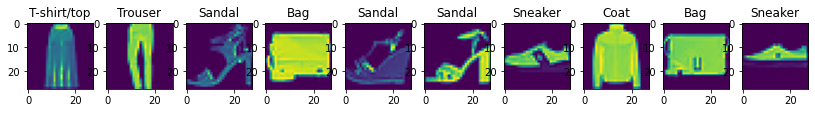

In [8]:
targets_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(14, 4))
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.title(targets_name[np.argmax(model.predict(images_test[i:i+1]), axis=-1)[0]])
    plt.imshow(images_test[i])
plt.show()

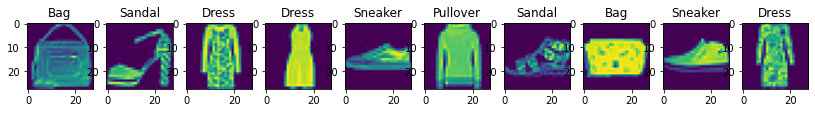

In [11]:
plt.figure(figsize=(14, 4))
for i in range(10, 20):
    plt.subplot(2, 10, i-9)
    plt.title(targets_name[np.argmax(model.predict(images_test[i:i+1]), axis=-1)[0]])
    plt.imshow(images_test[i])
plt.show()

In [ ]:
loss, acc = model.evaluate(images_test, targets_test)